In [1]:
%matplotlib notebook

In [2]:
from agent import Agent
from evaluator import policy_value_fn
from time import time

Loading the dataset


In [3]:
def whole_mcts(n_playout=100):
    agent = Agent(policy_value_fn,n_playout=n_playout)
    times,visit_times,Q_values = agent.play_outs()
    
    total_time = max(times)
    best_score = max(agent.mcts._storage.score)
    best_parameter = agent.mcts._storage.parameter[agent.mcts._storage.score.index(best_score)]
    print(total_time,best_score,best_parameter)
    
    return times,agent,visit_times,Q_values

In [4]:
n_playout = 100

times,agent,visit_times,Q_values = whole_mcts(n_playout=n_playout)

### Record the parameters and scores

In [6]:
n_playout_numbers = [i+1 for i in range(n_playout)]

In [8]:
def plot_score_increase(agent,n_playout_numbers,times,ds_name):
    scores = agent.mcts._storage.score
    best_score_of_playout = [max(scores[:ind]) for ind in n_playout_numbers ]
    import matplotlib.pyplot as plt
    x = [i for i in range(len(best_score_of_playout))]
    
    fig,ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('playout number')
    ax1.set_ylabel('best score',color=color)
    ax1.plot(x, best_score_of_playout,color=color,label ='best_score')
    ax1.tick_params(axis='y')     
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('total search time(s)', color=color)  # we already handled the x-label with ax1
    ax2.plot(x, times, color=color,label='time')
    ax2.tick_params(axis='y', labelcolor=color)
    plt.xticks(x,n_playout_numbers)
    plt.title('Dataset: {}'.format(ds_name))
    #plt.savefig('TEST')

<IPython.core.display.Javascript object>


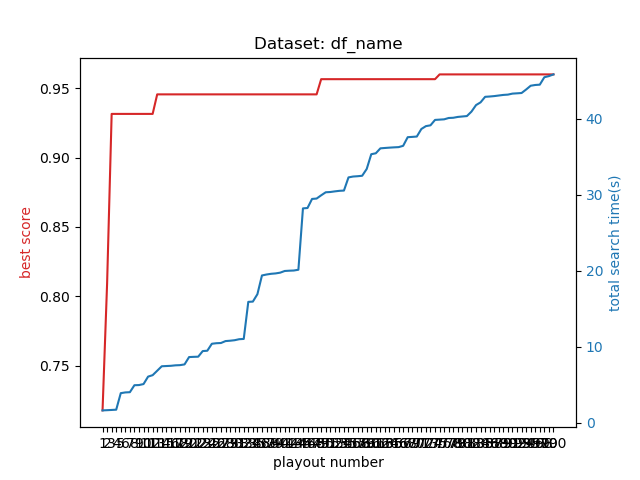

In [9]:
plot_score_increase(agent,n_playout_numbers,times,"df_name")

### TASK1: 改成一次跑150个playout，过程中记录 (完成)
### TASK2: 3D seaborn图，打印出随时间变化访问次数的分布

In [11]:
len(n_playout_numbers)

20

In [20]:
n_playout_numbers = n_playout_numbers[:-1]

<IPython.core.display.Javascript object>


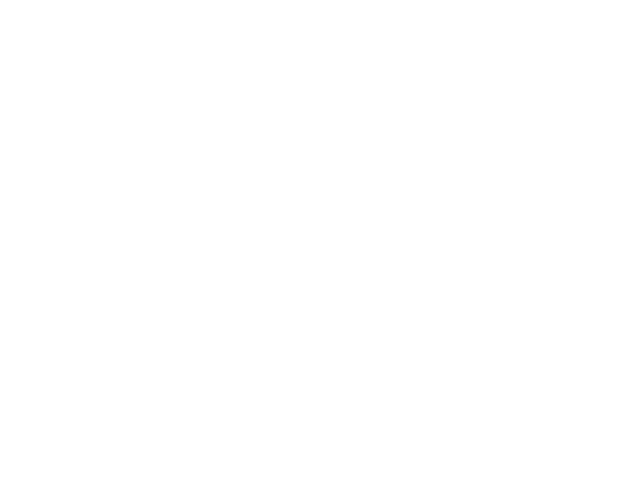

In [26]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y','r', 'g', 'b', 'y','r', 'g']

#for c, z ,ind in zip(colors, n_playout_numbers,n_playout_numbers):
for z ,ind in zip(n_playout_numbers,n_playout_numbers):
    xs = [i for i in range(12)]
    ys = Q_values[ind]
    
    #cs = [c] * len(xs)
    #cs[0] = 'c'
    #ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=1.0)
    ax.bar(xs, ys, zs=z, zdir='y', alpha=1.0)

ax.set_xlabel('Classifier names')
ax.set_ylabel('Playout time')
ax.set_zlabel('Q_value')
ax.set_xlim3d(0, 20)
ax.set_ylim3d(0, 20)
plt.title("Q_value Trend")
plt.show()


<IPython.core.display.Javascript object>


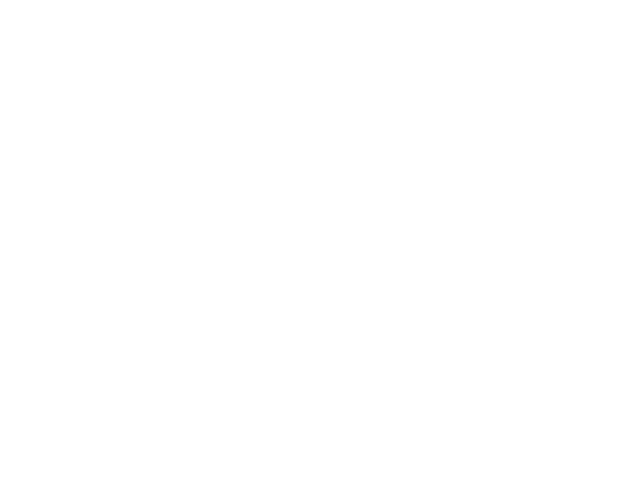

In [25]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y','r', 'g', 'b', 'y','r', 'g']

#for c, z ,ind in zip(colors, n_playout_numbers,n_playout_numbers):
for z ,ind in zip(n_playout_numbers,n_playout_numbers):
    xs = [i for i in range(12)]
    ys = visit_times[ind]
    
    #cs = [c] * len(xs)
    #cs[0] = 'c'
    #ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=1.0)
    ax.bar(xs, ys, zs=z, zdir='y', alpha=1.0)

ax.set_xlabel('Classifier names')
ax.set_ylabel('Playout time')
ax.set_zlabel('Q_value')
ax.set_xlim3d(0, 12)
ax.set_ylim3d(0, 12)
plt.title("visit time of every node")
plt.show()
